In [1]:
import matplotlib.pyplot as plt  # We are going to do our own graphing here
import glob as g
import json
import os

In [2]:
folder = "../_output/t_spring_stiffness/"

# gather all meta files in the folder
fnames = g.glob(folder + "\\*.meta.json")

saved to: ../_output/t_spring_stiffness/\figures\20.0.png


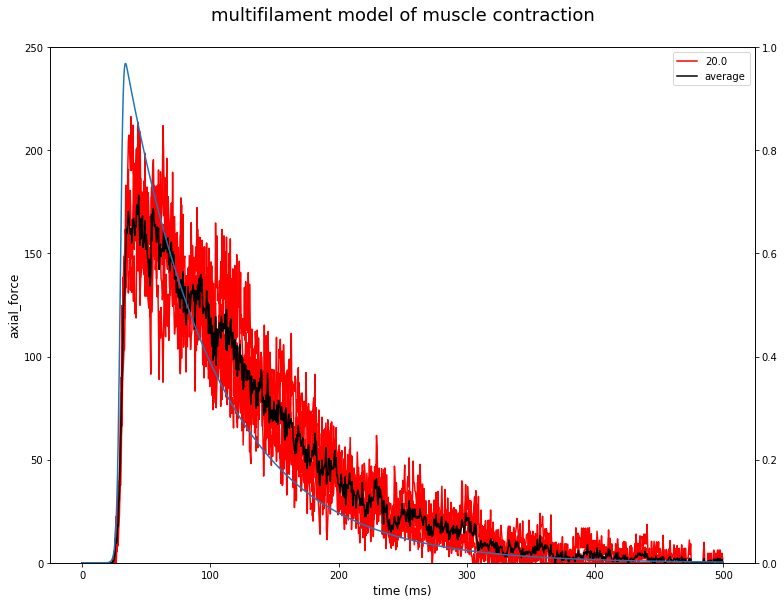

saved to: ../_output/t_spring_stiffness/\figures\60.0.png


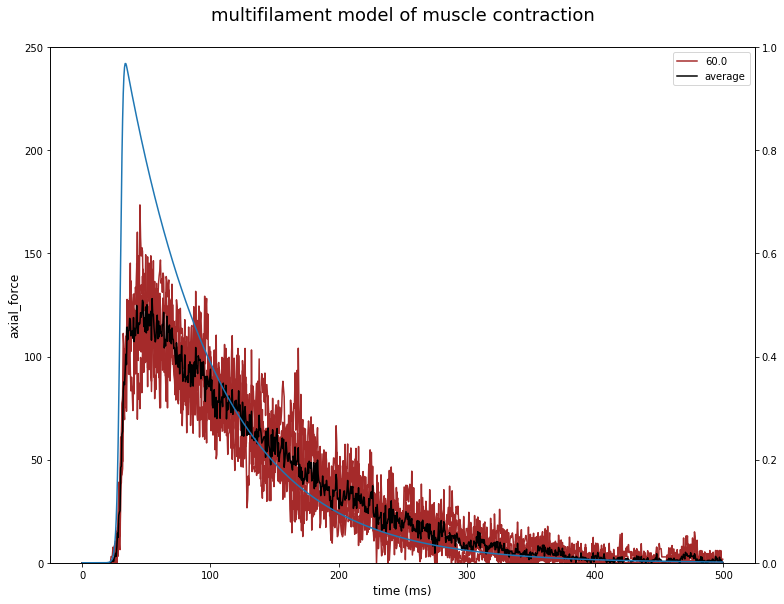

saved to: ../_output/t_spring_stiffness/\figures\80.0.png


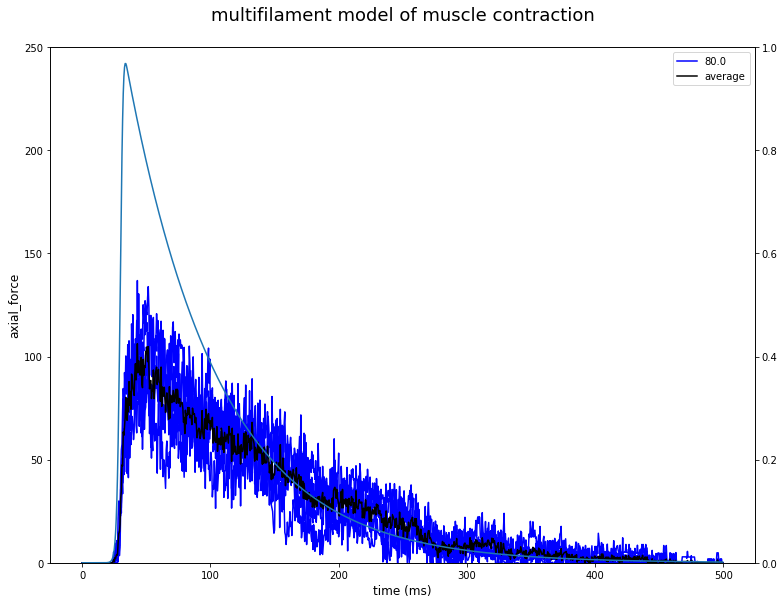

saved to: ../_output/t_spring_stiffness/\figures\100.0.png


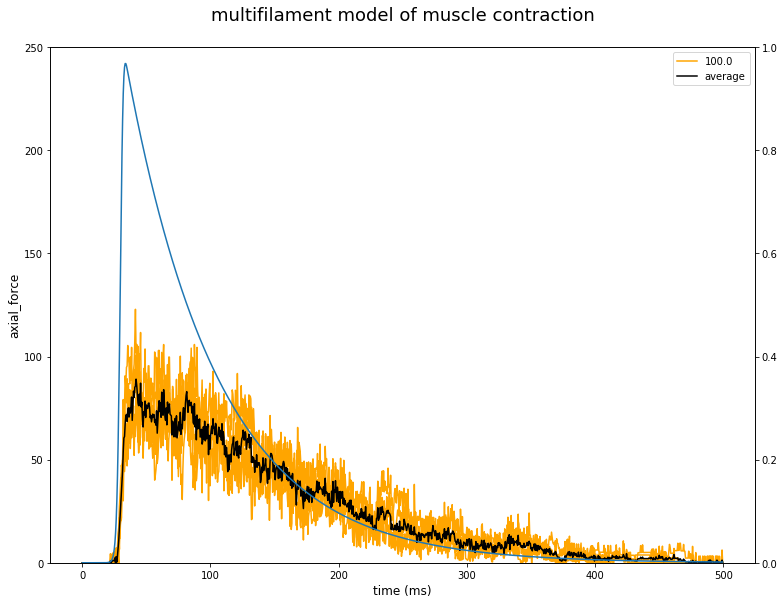

In [3]:
# Let's graph them each separately
save_figure = True
key = "axial_force"
fs = 12

ensemble = {}
for fname in fnames:
    try:
        # load metafile
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        
        # load datafile
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
            
        
        comment = float(meta['comment'])
        if comment in ensemble.keys():
            ensemble[comment].append(data)
        else:
            ensemble[comment] = [data]
    except FileNotFoundError:
        pass

colors = {20.0:'red',
         40.0:'gray',
         60.0:'brown',
         80.0:'blue',
         100.0:'orange'}

for comment, files in sorted(ensemble.items()):
    avg = None
    fig, axes = plt.subplots(figsize=(11, 8.5))
    for data in files:
        # recreate time trace
        time_trace = data['timestep'].copy()
        for i in range(len(time_trace)):
            time_trace[i] *= data['timestep_length']
            
        # plot this run, with transparency (alpha)
        axes.plot(time_trace, data[key], label=comment, color=colors[comment])

        # update average
        if avg is None:
            avg = data[key]
        else:
            for i in range(len(avg)):
                avg[i] += data[key][i]
                
    # now that we've summed the data, we need to average
    for i in range(len(avg)):
        avg[i] /= len(files)

    axes.plot(time_trace, avg, label='average', color='black')

    title = "multifilament model of muscle contraction\n"
    plt.title(title, fontsize=fs*1.5)
    plt.xlabel("time (ms)", fontsize=fs)
    plt.ylabel(key, fontsize=fs)
    axes.set_ylim(0, 250)
    
    # avoid duplicate legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    ax2 = plt.twinx()
    ax2.plot(time_trace, data['actin_permissiveness'])
    ax2.set_ylim(0, 1.0)

    plt.tight_layout()
    
    if save_figure:
        dest = folder + "\\figures\\" + str(comment) + ".png"
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        plt.savefig(dest, dpi=450)
        print("saved to:", dest)
        
    plt.show()

saved to: ../_output/t_spring_stiffness/\figures\Spring sweep.png


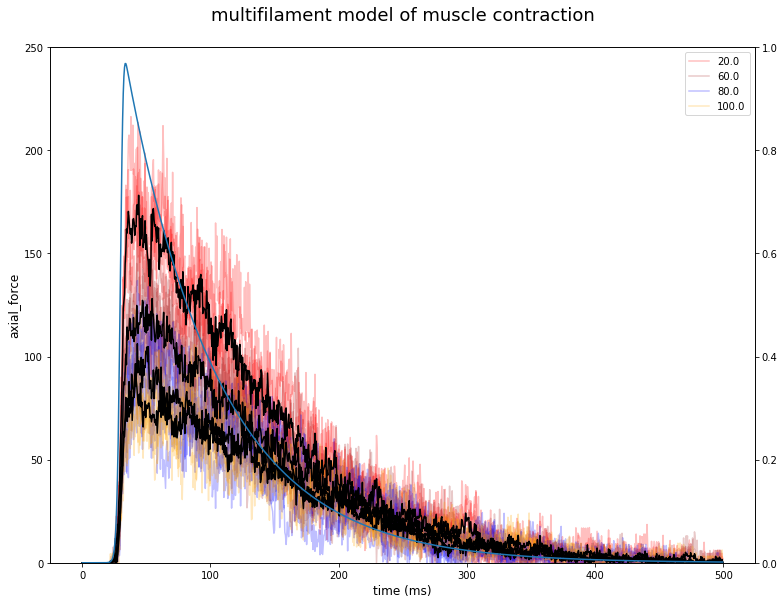

In [4]:
# Let's graph them all together
key = "axial_force"
fs = 12

fig, axes = plt.subplots(figsize=(11, 8.5))

ensemble = {}
for fname in fnames:
    try:
        # load metafile
        with open(fname, 'r') as metafile:
            meta = json.load(metafile)
        data_fname = fname.split('.meta')[0] + '.data.json'
        
        # load datafile
        with open(data_fname, 'r') as datafile:
            data = json.load(datafile)
            
        
        comment = float(meta['comment'])
        if comment in ensemble.keys():
            ensemble[comment].append(data)
        else:
            ensemble[comment] = [data]
    except FileNotFoundError:
        pass

colors = {20.0:'red',
         40.0:'gray',
         60.0:'brown',
         80.0:'blue',
         100.0:'orange'}

averages = {}
for comment, files in sorted(ensemble.items()):
    avg = None
    for data in files:
        # recreate time trace
        time_trace = data['timestep'].copy()
        for i in range(len(time_trace)):
            time_trace[i] *= data['timestep_length']
            
        # plot this run, with transparency (alpha)
        axes.plot(time_trace, data[key], label=comment, color=colors[comment], alpha=0.25)

        # update average
        if avg is None:
            avg = data[key]
        else:
            for i in range(len(avg)):
                avg[i] += data[key][i]
                
    # now that we've summed the data, we need to average
    for i in range(len(avg)):
        avg[i] /= len(files)
    
    # save it to plot it later over everything
    averages.update({comment:avg})

# avoid duplicate legend labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

for comment, avg in averages.items():
    axes.plot(time_trace, avg, label=comment, color='black')

title = "multifilament model of muscle contraction\n"
plt.title(title, fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

axes.set_ylim(0, 250)

ax2 = plt.twinx()
ax2.plot(time_trace, data['actin_permissiveness'])
ax2.set_ylim(0, 1.0)

plt.tight_layout()

if save_figure:
        dest = folder + "\\figures\\" + "Spring sweep" + ".png"
        os.makedirs(os.path.dirname(dest), exist_ok=True)
        plt.savefig(dest, dpi=450)
        print("saved to:", dest)
        
plt.show()